# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [50]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn

## Dataset


In [51]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")


In [ ]:
print(loan_data.head())
print(loan_data.info())
# 13 columns, first one loan_id is just a tracker. education is a categorical variable which requires encoding
# self_employed, and loan status (y variable) should be made numerical 
# Scaling should be done on the training data (and use the same means and variances for the testing)
# No missing values in the data


## EDA
Uncomment to see desired output. Add more analysis if you like

In [ ]:


# ------ Display basic information ------
#print(loan_data.columns)
#print(loan_data.describe())

# ------ Check for missing values ------
#print(loan_data.isnull().sum())

# ------ Visualize the distribution of loan status ------
# loan_status_counts = loan_data['loan_status'].value_counts()
# plt.bar(loan_status_counts.index, loan_status_counts.values)
# plt.title('Distribution of Loan Status')
# plt.xlabel('Loan Status')
# plt.ylabel('Count')

# Slight imbalance in classes but not enough to justify SMOTE or other synthetic balancing techniques. Will handle by
# plotting class specific metrics once the models are trained (during testing). Will also use stratified cross validation 
# so that the imbalance doesn't become worse during training

# ------ Visualize the distribution of numerical features ------ 
loan_data.hist(bins=30, figsize=(20, 15))
# Strong right skew in the later variables.
# Do not need to do too much about it. Could explore a log1p() transformation but it is not necessary
# on experiment, the lop1p leads to null values in one of the variables so it is omitted


# ------ Correlation matrix ------
# corr_matrix = loan_data.corr()
# fig, ax = plt.subplots(figsize=(10, 8))
# cax = ax.matshow(corr_matrix, cmap='coolwarm')
# fig.colorbar(cax)
# plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Correlation matrix to be plotted later once encoding for the categorical data and the scaling is completed

# ----- MORE (Encouraged but not required) ------

# We know that the education, self_employed and loan_status are the categorical features. Before encoding, have to see the values

print(loan_data['education'].unique())
print(loan_data['self_employed'].unique())
print(loan_data['loan_status'].unique())

# All 3 of these variables only have 2 values which allows for easy 0-1 encoding
# will do more once the data is all cleaned up (encoding wise)

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [53]:
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})
# Hint: Other categorical variables are self_employed and loan_status
loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})
loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Rejected': 0})


loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [ ]:
# All variables are now numerical. Can perform some more EDA measures now.
# Steps to be taken:
# Correlation matrix with all the variables in to see which variables are good predictors of the response.
# This matrix will also find correlations that would signal multicollinearity
# Graphs (such as box plots) while treating the response as a categorical variable to see if predictors have a non linear relationship with the response


# ------ Correlation matrix ------
corr_matrix = loan_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

In [ ]:
# Based on the correlation matrix, there aren't too many variables that have a strong correlation with loan_status
# Need to investigate slightly more. Will plot box plots to see the distributions for each variable with the loan status creating two different plots
# This will give a better idea of whether tree based models would be a better fit for the data

cols = loan_data.columns
features = [c for c in cols if c not in ["loan_id", "loan_status"]] 

for col in features:
    ax = loan_data.boxplot(column=col, by="loan_status", grid=False)
    plt.title(col); plt.suptitle("")
    plt.xlabel("loan_status"); plt.ylabel(col)
    plt.show()

# Not sure what to make of this since very few variables show clear differences. Alternate strategy: fit a model and use features_importances_/ RFE to decide
# So far CIBIL score is a very strong predictor. It was also the strongest correlation with the loan_status in the correaltio matrix

## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [ ]:
# Models to be used are 
# logistic regression 
# random forest
# xgboost
# SVM

## Model Training and Evaluation

In [56]:
# Steps here
# train test split
# Scaling
# Use Recursive Feature Elimination with CV to find the best features for a given model
# Fit said model based on chosen features using hyperparameter tuning as well
# Evaluate each model using ROC-AUC, recall and precision, accuracy and GINI
# This pipeline will be followed independently for each model to make it cleaner

X = loan_data.drop(columns = ['loan_id','loan_status']).copy()
y = loan_data['loan_status'].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train) 
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test),  index=X_test.index,  columns=X_test.columns)
# no need to scale y

In [ ]:
# Logistic Regression
# Pipeline is as given earlier - choose features using RFE, train and tune model and then evaluate it
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# fitting RFE for feature selection
rfe_lr = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=7, step=1)
rfe_lr.fit(X_train_scaled, y_train)

selected_cols_lr = X_train_scaled.columns[rfe_lr.support_].tolist()
X_train_lr = X_train_scaled[selected_cols_lr].copy()
X_test_lr  = X_test_scaled[selected_cols_lr].copy()

print("Selected features:", selected_cols_lr)

#Fitting model based on the selected features and adding hyperparameter tuning through gridsearch

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

best_lr = LogisticRegression(max_iter=2000)
best_lr.fit(X_train_lr, y_train)
# experimented with gridsearch for c value which caused overfitting in the training data. train - test AUC = 0.07 
# simplified model down to avoid said overfitting


# Evaluation for the given Log Reg model
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,accuracy_score)

test_prob_lr = best_lr.predict_proba(X_test_lr)[:, 1]
threshold = 0.5 #can be changed based on business intelligence, however simplest value chosen here
test_pred_lr = (test_prob_lr >= threshold).astype(int)

train_prob_lr = best_lr.predict_proba(X_train_lr)[:, 1]
train_auc_lr = roc_auc_score(y_train, train_prob_lr)
print("Train ROC-AUC: ",train_auc_lr)

auc_lr = roc_auc_score(y_test, test_prob_lr)
print("Test ROC-AUC: ",auc_lr)
# the AUC being 0.90 is high. Since we trained basis AUC as well, we can see the difference between test and train 
# 0.01 difference between train and test is enough to reject the hypothesis of  overfitting

gini_lr  = 2*auc_lr - 1
print("Test GINI Index: ",gini_lr)

accuracy_lr  = accuracy_score(y_test, test_pred_lr)
print("Test Accuracy: ",accuracy_lr)

precision_lr = precision_score(y_test, test_pred_lr, zero_division=0)
print("Test Precision: ",precision_lr)

recall_lr = recall_score(y_test, test_pred_lr, zero_division=0)
print("Test Recall: ",recall_lr)

cm_lr = confusion_matrix(y_test, test_pred_lr)
print("Confusion Matrix: ",cm_lr)
# All of these metrics are very strong, bordering too good. 

Selected features: ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Train ROC-AUC:  0.9675720930232559
Test ROC-AUC:  0.9729408266428784
Test GINI Index:  0.9458816532857568
Test Accuracy:  0.9121779859484778
Test Precision:  0.9191176470588235
Test Recall:  0.9416195856873822
Confusion Matrix:  [[279  44]
 [ 31 500]]


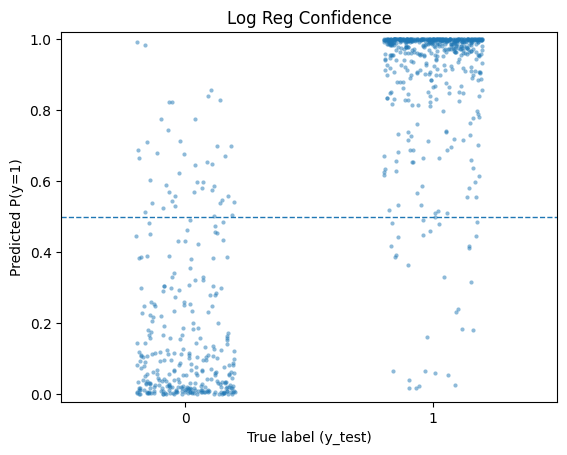

x    61
y    61
dtype: int64
x    531
y    531
dtype: int64
x    75
y    75
dtype: int64
x    323
y    323
dtype: int64


In [ ]:
# Since the question also mentions likelihood of the approval or rejection, we shall also visualize the predicted probablities
# The idea is to see if the models make confident decisions (probabilities closer to 0 or 1) or simply around 0.5.


# For the log reg model above first
# Since the data is likely to be very concentrated, using seaborn and incorporating jitter in to make graph more informative

import seaborn as sns

df_lr = pd.DataFrame({"x": np.asarray(y_test).astype(int), "y": test_prob_lr})

plt.figure()
sns.stripplot(data=df_lr, x="x", y="y", jitter=0.2, alpha=0.5, size=3)
plt.axhline(0.5, ls="--", lw=1)
plt.ylim(-0.02, 1.02)
plt.xlabel("True label (y_test)")
plt.ylabel("Predicted P(y=1)")
plt.title("Log Reg Confidence")
plt.show()
# Based on the graph, the model is making reasonably confident decisions. A little more data exploration is conducted below

print(df_lr[(df_lr['x'] == 1) & (df_lr['y']<0.7)].count()) # number of true positive where the probability is less than 0.7
print(df_lr[df_lr['x']== 1].count()) # for reference
# When the true value is 1, the log reg model predicts 1 with probability greater than 0.7 (531-61)/531 = 88% times


print(df_lr[(df_lr['x']==0) & (df_lr['y']>0.3)].count()) # number of true negatives where prob is more than 0.3
print(df_lr[df_lr['x']== 0].count()) # for reference
# When the true value is 0, the log reg model predicts 0 with probability less than 0.3 (323-75)/323 = 76% times
# Does well for both, slightly better in the positive case in terms of confidence


In [ ]:
# Same pipeline with random forest to see if the results are better/similar/worse
# RFE and all evaluation metrics are already imported
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

rfe_rf = RFE(estimator=RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),n_features_to_select=7)
rfe_rf.fit(X_train_scaled, y_train)

selected_cols_rf = X_train_scaled.columns[rfe_rf.support_].tolist()
X_train_rf = X_train_scaled[selected_cols_rf].copy()
X_test_rf  = X_test_scaled[selected_cols_rf].copy()

print("Selected features:", selected_cols_rf)


cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid_rf = {
    "n_estimators": [200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

grid_rf = GridSearchCV(estimator=model_rf,param_grid=param_grid_rf,scoring="roc_auc",cv=cv_rf,n_jobs=-1,refit=True)

grid_rf.fit(X_train_rf, y_train)
print("Best params:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_

# Evaluation of Random Forest
train_prob_rf = best_rf.predict_proba(X_train_rf)[:, 1]
test_prob_rf  = best_rf.predict_proba(X_test_rf)[:, 1]

train_auc_rf = roc_auc_score(y_train, train_prob_rf)
test_auc_rf  = roc_auc_score(y_test,  test_prob_rf)
print("Train ROC-AUC:", train_auc_rf)
print("Test  ROC-AUC:", test_auc_rf)

# GINI Index
gini_rf = 2 * test_auc_rf - 1
print("Test GINI Index:", gini_rf)

threshold = 0.5
test_pred_rf = (test_prob_rf >= threshold).astype(int)

accuracy_rf = accuracy_score(y_test, test_pred_rf)
print(accuracy_rf)

precision_rf = precision_score(y_test, test_pred_rf, zero_division=0)
print(precision_rf)

recall_rf = recall_score(y_test, test_pred_rf, zero_division=0)
print(recall_rf)

cm_rf = confusion_matrix(y_test, test_pred_rf)
print(cm_rf)

# Random forest performs extremely well on the data. It fits the training data perfectly and is almost just as good on the 
# test data (based on AUC). All other metrics are also high, much better than the log reg model

Selected features: ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value']
Best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train ROC-AUC: 1.0
Test  ROC-AUC: 0.9989067884067098
Test GINI Index: 0.9978135768134195
0.9824355971896955
0.9795539033457249
0.992467043314501
[[312  11]
 [  4 527]]


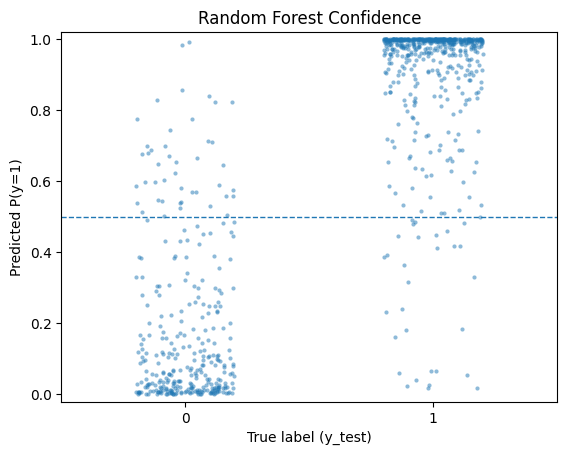

x    14
y    14
dtype: int64
x    531
y    531
dtype: int64
x    19
y    19
dtype: int64
x    323
y    323
dtype: int64


In [ ]:
# Confidence inspection for RF

df_rf = pd.DataFrame({"x": np.asarray(y_test).astype(int), "y": test_prob_rf})

plt.figure()
sns.stripplot(data=df_lr, x="x", y="y", jitter=0.2, alpha=0.5, size=3)
plt.axhline(0.5, ls="--", lw=1)
plt.ylim(-0.02, 1.02)
plt.xlabel("True label (y_test)")
plt.ylabel("Predicted P(y=1)")
plt.title("Random Forest Confidence")
plt.show()
# Based on the graph, the model is making very confident decisions. A little more data exploration is conducted below

print(df_rf[(df_rf['x'] == 1) & (df_rf['y']<0.7)].count()) # number of true positive where the probability is less than 0.7
print(df_rf[df_rf['x']== 1].count()) # for reference
# When the true value is 1, the RF model predicts 1 with probability greater than 0.7 (531-14)/531 = 97% times


print(df_rf[(df_rf['x']==0) & (df_rf['y']>0.3)].count()) # number of true negatives where prob is more than 0.3
print(df_rf[df_rf['x']== 0].count()) # for reference
# When the true value is 0, the RF model predicts 0 with probability less than 0.3 (323-19)/323 = 94% times
# Does incredibly well in terms of confidence, especially for the positive case.

In [ ]:
# Using SVM (alternate method to check if linear separability is a better approach for the data)

from sklearn.svm import LinearSVC

rfe_svm = RFE(estimator=LinearSVC(max_iter=5000, dual="auto", random_state=42),n_features_to_select=7)
rfe_svm.fit(X_train_scaled, y_train)

selected_cols_svm = X_train_scaled.columns[rfe_svm.support_].tolist()
X_train_svm = X_train_scaled[selected_cols_svm].copy()
X_test_svm  = X_test_scaled[selected_cols_svm].copy()

print("Selected features:", selected_cols_svm)

cv_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_svm = LinearSVC(max_iter=5000, dual="auto", random_state=42)

param_grid_svm = {"C": [0.01, 0.1, 1, 10, 100]}

grid_svm = GridSearchCV(estimator=model_svm,param_grid=param_grid_svm,scoring="roc_auc",cv=cv_svm,n_jobs=-1,refit=True)

grid_svm.fit(X_train_svm, y_train)
print("Best params:", grid_svm.best_params_)

best_svm = grid_svm.best_estimator_

# Since SVM does not give probabilities, we cannot use predict_proba or similar uses. 
# Instead we can use decision_function and use 0 as the threshold to get the sign of the score

train_dec_svm = best_svm.decision_function(X_train_svm)
test_dec_svm  = best_svm.decision_function(X_test_svm)

train_auc_svm = roc_auc_score(y_train, train_dec_svm)
test_auc_svm  = roc_auc_score(y_test,  test_dec_svm)
print("Train ROC-AUC:", train_auc_svm)
print("Test  ROC-AUC:", test_auc_svm)

test_pred_svm = (test_dec_svm >= 0).astype(int)

accuracy_svm = accuracy_score(y_test, test_pred_svm)
print("Test Accuracy: ",accuracy_svm)
precision_svm = precision_score(y_test, test_pred_svm, zero_division=0)
print("Test Precision: ",precision_svm)
recall_svm = recall_score(y_test, test_pred_svm, zero_division=0)
print("Test Recall: ",recall_svm)
cm_svm = confusion_matrix(y_test, test_pred_svm)
print(cm_svm)
# Performs similar to log reg but not as well as the random forest across all metrics

Selected features: ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Best params: {'C': 10}
Train ROC-AUC: 0.9675491108071135
Test  ROC-AUC: 0.9726901167841504
Test Accuracy:  0.9121779859484778
Test Precision:  0.9206642066420664
Test Recall:  0.9397363465160076
[[280  43]
 [ 32 499]]


In [ ]:
# SVM does not provide proababilities like the others. Therefore, it makes the confidence inference harder.
# A sigmoid function can be used to map but that is not necessary based on the success of Random Forest.

## Model Optimization and Testing

In [ ]:
# Done in previous sections.

Findings:
After experimenting with three models, using RFE for feature selection and gridsearch for hyperparameter tuning, all three models perform incredibly well across all used metrics (AUC, GINI, precision, recall, accuracy). The model seems to hint at overfitting but since it does just as wel on the test data, that is discarded.
Of the three models, Random Forest performs optimally with a train ROC of 1 and a test ROC of 0.998, both of which are near perfect. 
Using the confidence testing done after fitting the model, we also see that random forest provides very confident decisions with 97% of true postives achieving a predicted probability greater than 0.7 and 94% of true negatives achieving predicted probability below 0.3.
Random Forest is therefore, the most ideal model for this particular data set.